In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##Loading Data

In [10]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()


In [11]:
type(train_data), train_data.dtype, train_data.shape

(numpy.ndarray, dtype('uint8'), (60000, 28, 28))

In [12]:
type(train_labels), train_labels.dtype, train_labels.shape

(numpy.ndarray, dtype('uint8'), (60000,))

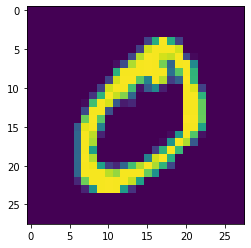

In [13]:
plt.imshow(train_data[1])

In [14]:
train_labels[1]

0

## Some Preprocessing

In [31]:
train_data = np.reshape(train_data, newshape=(-1, 28 * 28))
train_data.shape, train_data.dtype


((60000, 784), dtype('float32'))

In [16]:
test_data = np.reshape(test_data, newshape=(-1, 28 * 28))
test_data.shape, test_data.dtype

((10000, 784), dtype('uint8'))

In [17]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)
train_labels.shape, train_labels.dtype

((60000, 10), dtype('float32'))

In [18]:
test_labels = to_categorical(test_labels, num_classes=10)
test_labels.shape, train_labels.dtype

((10000, 10), dtype('float32'))

In [19]:
train_data = train_data.astype('float32') / 255.0
train_data.shape, train_data.dtype

((60000, 784), dtype('float32'))

In [20]:
test_data = test_data.astype('float32') / 255.0
test_data.shape, test_data.dtype

((10000, 784), dtype('float32'))

In [21]:
train_data.mean(), test_data.mean()

(0.13066062, 0.13251467)

##Creating and Training Model

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

input_layer = Input(shape=(784,))
x = Dense(units=512, activation='relu')(input_layer)
x = Dropout(0.3)(x)
x = Dense(units=256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(units=10, activation='softmax')(x)

my_model = Model(inputs=input_layer, outputs=predictions)

my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0     

In [23]:
from tensorflow.keras.optimizers import SGD, Adam

my_model.compile(optimizer=Adam(learning_rate=0.0001),
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

my_model.fit(x=train_data, y=train_labels,
                              batch_size=32, epochs=50, shuffle=True,
                              validation_data=(test_data, test_labels))

Epoch 1/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6131 - accuracy: 0.8120 - val_loss: 0.2023 - val_accuracy: 0.9395
Epoch 2/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2434 - accuracy: 0.9291 - val_loss: 0.1431 - val_accuracy: 0.9545
Epoch 3/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1761 - accuracy: 0.9486 - val_loss: 0.1097 - val_accuracy: 0.9666
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1387 - accuracy: 0.9592 - val_loss: 0.0949 - val_accuracy: 0.9688
Epoch 5/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1143 - accuracy: 0.9657 - val_loss: 0.0824 - val_accuracy: 0.9746
Epoch 6/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0962 - accuracy: 0.9709 - val_loss: 0.0741 - val_accuracy: 0.9774
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0831 - accuracy: 0.9749 - val_loss: 0.0707 - val_

##Model Evaluation

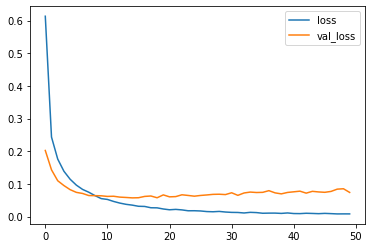

In [25]:
model_loss_history = pd.DataFrame({'loss': my_model.history.history['loss'],
                                   'val_loss': my_model.history.history['val_loss']})
model_loss_history.plot()

In [26]:
model_loss_history['val_loss'].min()

0.05724107846617699

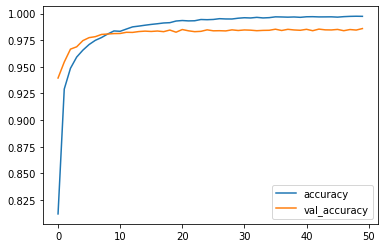

In [27]:
model_accuracy_history = pd.DataFrame({'accuracy': my_model.history.history['accuracy'],
                                       'val_accuracy': my_model.history.history['val_accuracy']})

model_accuracy_history.plot()

In [28]:
model_accuracy_history['val_accuracy'].max()

0.9858999848365784

In [29]:
my_model.evaluate(x=test_data, y=test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9859


[0.07393412292003632, 0.9858999848365784]